In [1]:
# !pip install spinesTS

# MLPTorchModel

In [2]:
from spinesTS.preprocessing import split_series
from sklearn.preprocessing import StandardScaler
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.pipeline import Pipeline

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import MLPTorchModel
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

Existing CSV file list: 
>> >> >> >> >> >> >> >> >> >> 
    Electric_Production
    Messages_Sent
    Messages_Sent_Hour
    Series_0
    Series_1
    Series_2
    Series_3
    Series_4
    Series_5
    Series_6
    Series_7
    Series_8
    Series_9
    Supermarket_Incoming
    Web_Sales
<< << << << << << << << << << 


In [6]:
cs = series_data['Series_0']
cs_data = cs.dataset['turnover_1']
x_train_cs, x_test_cs, y_train_cs, y_test_cs = split_series(cs_data, cs_data, 420, 420, train_size=0.8)

## MLP model

In [7]:
multi_reg = MLPTorchModel(420, 420, random_seed=666, res_dense_blocks=1, learning_rate=0.001)

In [8]:
multi_reg.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         LayerNorm-1                  [-1, 420]             840
 HierarchicalLayer-2                  [-1, 210]               0
            Linear-3                  [-1, 210]          44,310
              ReLU-4                  [-1, 210]               0
         LayerNorm-5                  [-1, 210]             420
          ResBlock-6                  [-1, 210]               1
            Linear-7                  [-1, 210]          44,310
              ReLU-8                  [-1, 210]               0
         LayerNorm-9                  [-1, 210]             420
         ResBlock-10                  [-1, 210]               1
         ResBlock-11                  [-1, 210]               1
           Linear-12                  [-1, 210]          44,310
             ReLU-13                  [-1, 210]               0
        LayerNorm-14                  [

r2: -0.7296732734053923
mae: 86.02221190588814
mape: 0.6871468898518374


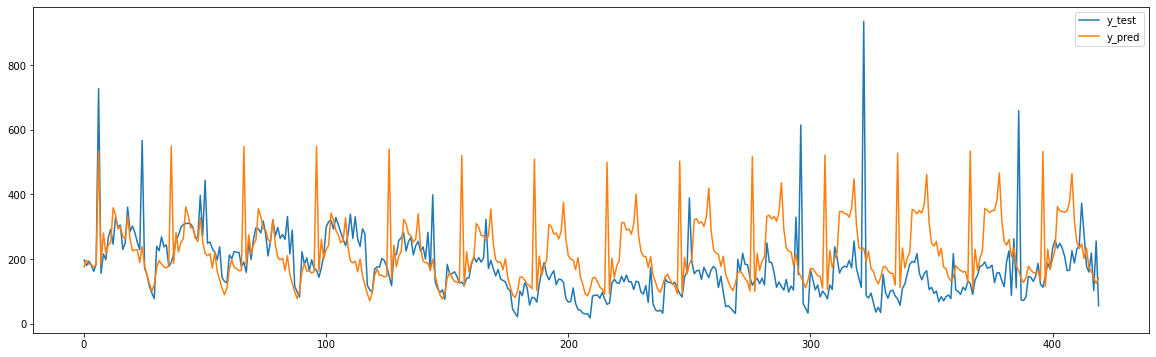

In [9]:
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: -0.679758713304865
mae: 89.75520007723854
mape: 0.7202149380023891


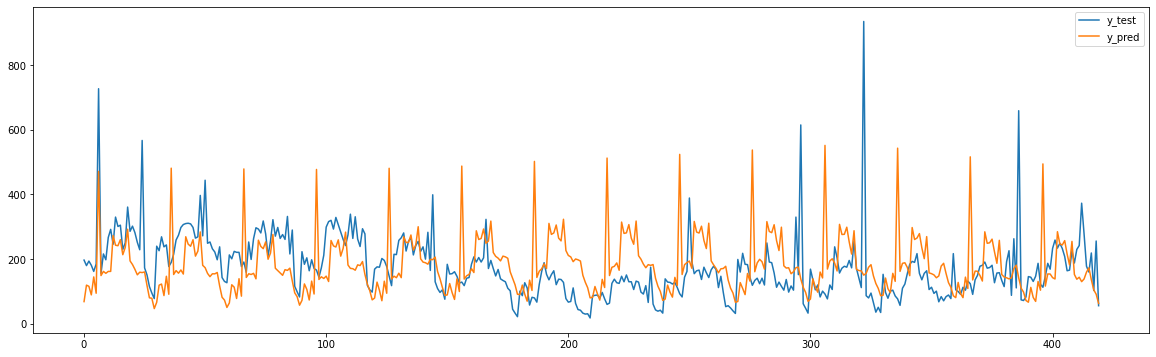

In [10]:
multi_reg = MLPTorchModel(420, 420, random_seed=666, res_dense_blocks=2, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: -0.6530743282343222
mae: 84.74753183637347
mape: 0.6683562148617536


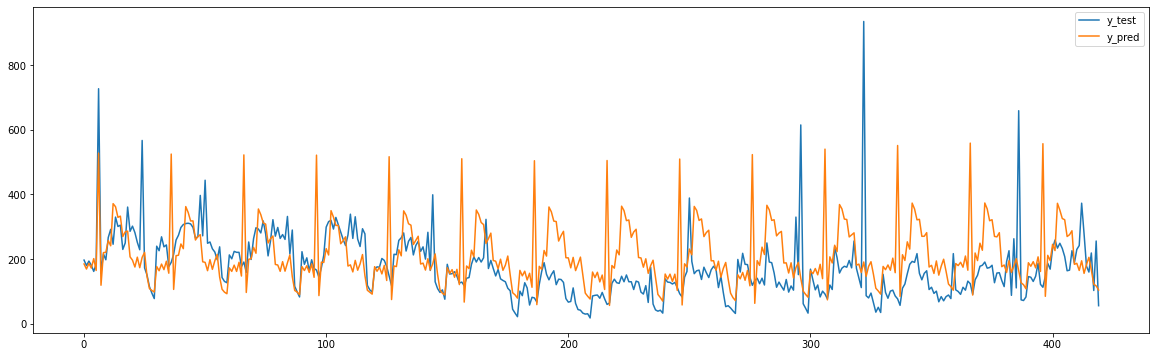

In [11]:
multi_reg = MLPTorchModel(420, 420, random_seed=666, res_dense_blocks=4, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: -0.5464568697179517
mae: 87.86438008262998
mape: 0.7242318556058305


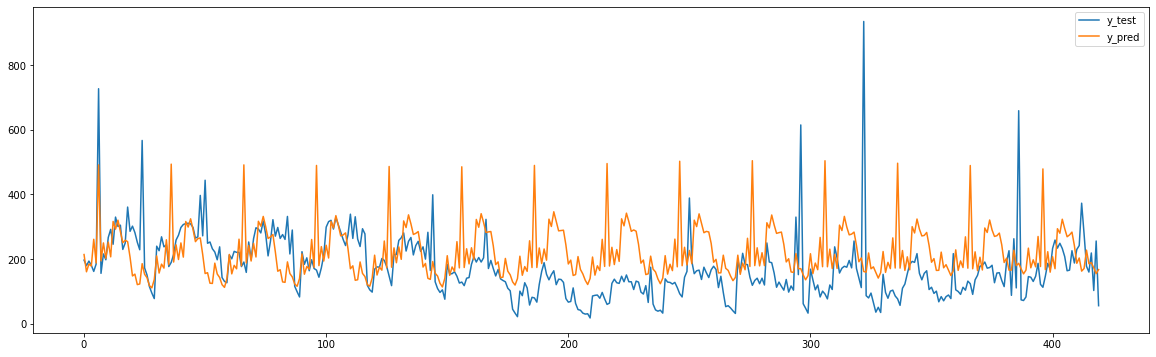

In [12]:
pp = Pipeline([
    ('sc', StandardScaler()),
    ('model', MLPTorchModel(420, 420, random_seed=666, res_dense_blocks=1, learning_rate=0.001))
])

pp.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = pp.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: 0.42726036812622376
mae: 69.99286360112833
mape: 0.38305723678674775


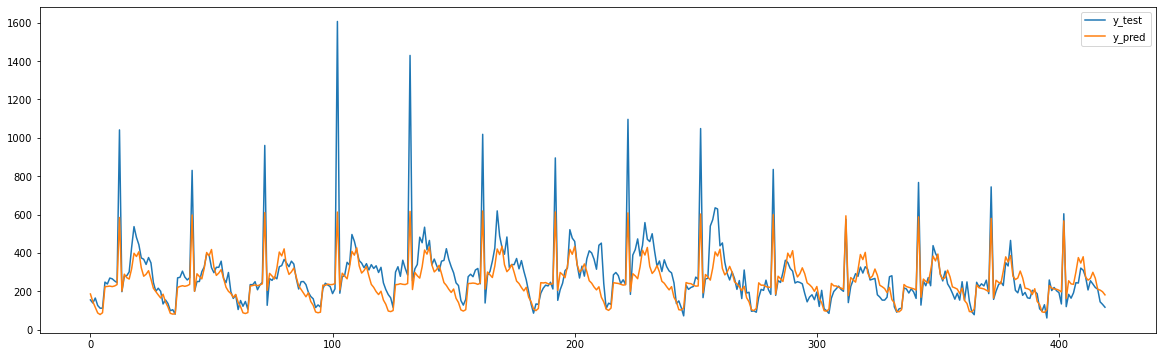

In [13]:
y_pred_cs = pp.predict(x_test_cs[:-2])
print(f"r2: {r2_score(y_test_cs[:-2].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[:-2], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[:-2], y_pred_cs)}")
plot2d(y_test_cs[:-2], y_pred_cs, fig_num_or_slice=slice(0, 1), labels=['y_test', 'y_pred'])